In [9]:
import numpy as np
import matplotlib.pyplot as pl
import matplotlib
mplparams = {
    'text.usetex': True,
    'axes.linewidth': 1,
    'lines.linewidth' : 1.5,
    'axes.grid': False,
    'axes.labelweight': 'normal',
    'font.family': 'DejaVu Sans',
    'font.size': 26,
    'figure.figsize': (10,8),
    'legend.fontsize': 26,
    'legend.handlelength' : 2,
    'axes.grid' : True,
    'mathtext.cal' : 'stix:italic',
    'mathtext.fontset' : 'custom',
}
matplotlib.rcParams.update(mplparams)

In [10]:
red = '#D60606'
blue = '#0083DE'
green = '#00BA75'
yellow = '#FFC61E'
purple = '#A433B3'
orange = '#FD882E'
color_arr = [red, blue, green, yellow, purple, orange]

## FF=0

In [11]:
data = np.loadtxt('../SNR_vs_BF/results/BF_scaling_220_ALL.dat')
idx = data.T[0]<250
[SNRtot_MF, log_BF, occams, mass_in_solar, chi_inject] = data.T[:,idx]

In [12]:
coeff, err = np.polyfit(SNRtot_MF, log_BF-np.log(occams), deg=2, cov=True)
print(r'Quadratic coefficient = %.5f +- %.5f' % (coeff[0], np.sqrt(err[0,0])))

Quadratic coefficient = 0.49997 +- 0.00004


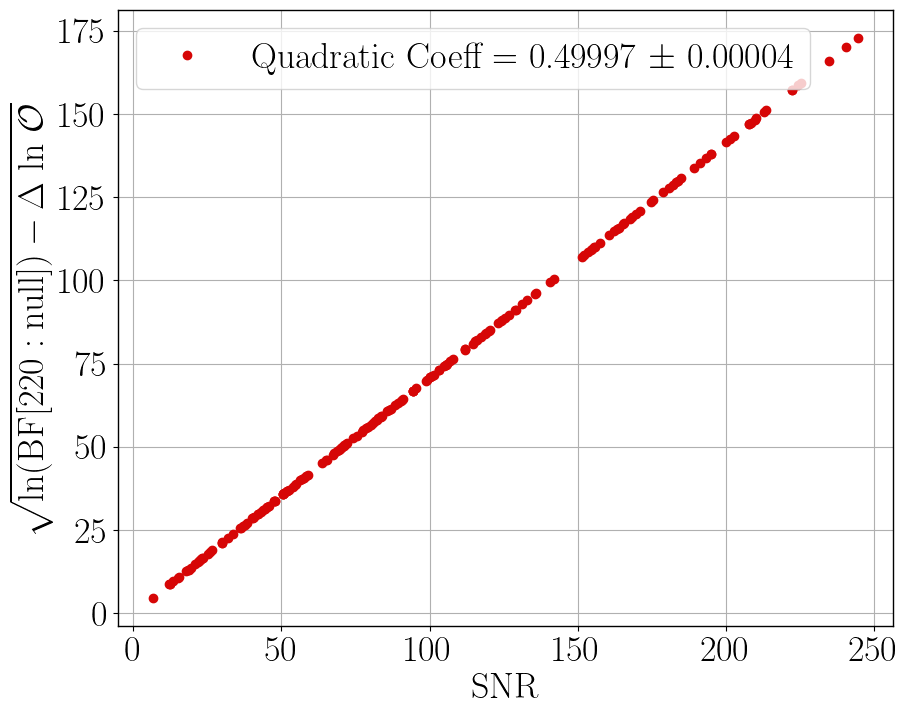

In [31]:
pl.plot(SNRtot_MF, np.sqrt(log_BF-np.log(occams)), 'o', color=red, label=r'Quadratic Coeff = %.5f $\pm$ %.5f' % (coeff[0], np.sqrt(err[0,0])))
pl.xlabel("SNR")
pl.ylabel(r'$\sqrt{\mathrm{ln(BF [220:null])} - \Delta \textrm{ ln } \mathcal{O}}$')
pl.legend()
pl.savefig("plots/SNR_scaling-220:null.pdf")

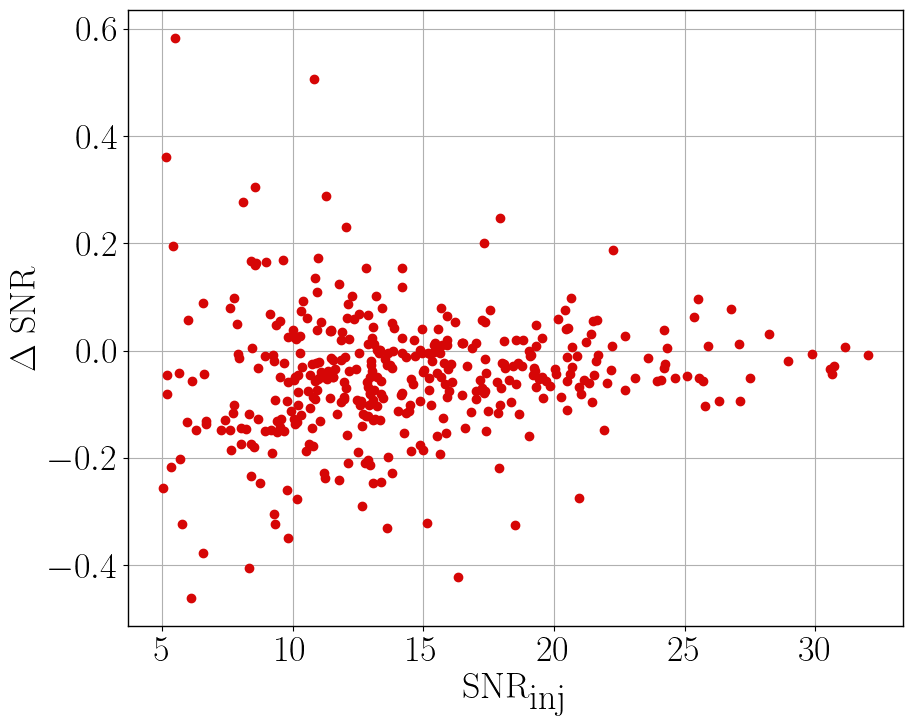

In [32]:
data = np.loadtxt('../SNR_vs_BF/results/BF_scaling_low_SNR220_ALL.dat')
idx = data.T[0]>5
[SNRtot_MF, log_BF, occams, mass_in_solar, chi_inject] = data.T[:,idx]
inferred_SNR = np.sqrt(2*log_BF - 2*np.log(occams))
residual = inferred_SNR - SNRtot_MF
pl.plot(SNRtot_MF, residual, 'o', color=red)

# data = np.loadtxt('./results/BF_scaling_diff_acf_220_ALL.dat')
# [SNRtot_MF, log_BF, occams, mass_in_solar, chi_inject] = data.T
# inferred_SNR = np.sqrt(2*log_BF - np.log(occams))
# residual = inferred_SNR - SNRtot_MF
# pl.plot(SNRtot_MF, residual, 'o')
pl.xlabel(r"SNR$_{\textrm{inj}}$")
pl.ylabel(r"$\Delta$ SNR")
pl.savefig("plots/SNR_error_vs_SNR-220.pdf")